Element pattern
====
Last updated: 28 Sept 2018  

This notebook will read a CST antenna pattern file and save in a python formate for use by other notebooks.  
This notebook will also create an idealized pattern from a cartiod shape.  

For now will read old S-Band roll cut data from Rick and use as a base to generate a full pattern.  


**need to make sure that theta and phi run in the same direction as the array**



In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CST antenna pattern file
data file exported from CST.  
header from data file:  
```
// CST Farfield Source File
// Version: 3.0 
// Data Type Farfield 
// #Frequencies 1 
// Position 2.255973e-017 0.000000e+000 -8.354133e-002 
// zAxis 0.000000e+000 1.000000e+000 0.000000e+000 
// xAxis 0.000000e+000 0.000000e+000 1.000000e+000 
// Radiated/Accepted/Stimulated Power , Frequency 1.905259e+000 1.981235e+000 2.000000e+000 2.240000e+009 
// >> Total #phi samples, total #theta samples 361 181
// >> Phi, Theta, Re(E_Theta), Im(E_Theta), Re(E_Phi), Im(E_Phi): 
```

In [2]:
# read the pattern data from the CTS file
A = np.loadtxt('Antenn Pattern from CST.ffs')
print('length of data set = {:d} lines'.format(len(A)))

length of data set = 65341 lines


In [14]:
# create arrays to hold the pattern data
step = 1
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max+1,step)

E_theta = np.empty((len(theta),len(phi)), dtype=complex)
E_phi = np.empty((len(theta),len(phi)), dtype=complex)

In [15]:
# digest the data
for k in range(len(A)):
    i = int(A[k,1])  # theta index
    j = int(A[k,0])  # phi index
    E_theta[i,j] = A[k,2] + A[k,3]*1J
    E_phi[i,j] = A[k,4] + A[k,5]*1J

In [17]:
F = np.sqrt(E_theta**2+E_phi**2)

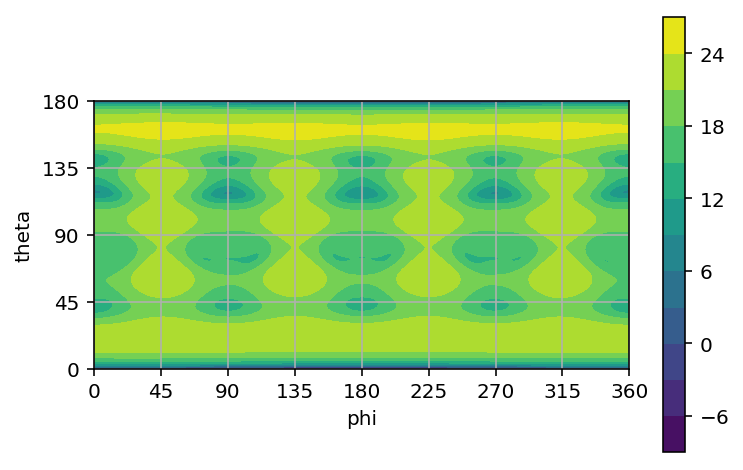

In [19]:
F_plt = 20*np.log10(abs(F)) # convert to dB magnitude for plotting
F_plt  = np.clip(F_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max+1,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,F_plt,10)
plt.axis('image')
#ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

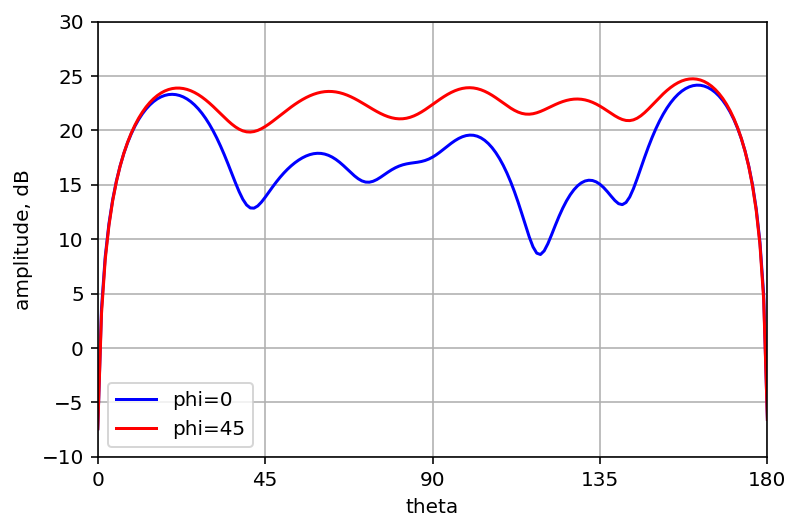

In [23]:
# plotting principle plane cuts
plt.plot(theta,F_plt[:,0],'b',label='phi=0')
plt.plot(theta,F_plt[:,45],'r',label='phi=45')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-10,30)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

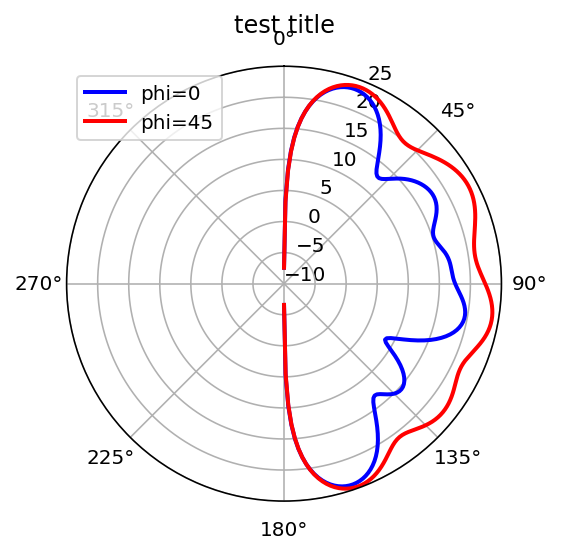

In [25]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -10 #set plot grid
maxGrid = 30
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,F_plt[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,F_plt[:,45],'r',linewidth = 2,label='phi=45')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

# Read sample input file
This is a one cut from the pattern.  

In [0]:
# read sample patch gain pattern
df1 = pd.read_csv('Pattern data 1E.csv')
num = len(df1)
print('number of lines in data file = {:d}'.format(num))

In [0]:
# show top of data file
df1.head(10)

In [0]:
# read phi and gain values
phi = df1['Phi'].values
gain_dB = df1['Gain_dB'].values

# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -15 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(phi*2*np.pi/360,gain_dB, 'b', linewidth = 2, label = 'gain')

# Setting the graph title & legend
ax.set_title("test title")

plt.show()

In [0]:
# make variables theta and phi, need to convert to radians before any math
step = 2  # step size for various ranges
theta = np.arange(0,181,step) # 0 to 180 degrees, include end points
#phi = np.arange(-180,180,step) # 0 to 359 degrees

In [0]:
# make variables theta and phi, need to convert to radians before any math
step = 2  # step size for various ranges
theta = np.arange(-90,91,step) # 0 to 180 degrees, include end points
phi = np.arange(0,360,step) # 0 to 359 degrees

In [0]:
# build full pattern from roll cut pattern
R_dB = np.broadcast_to(gain_dB[0:-1], (len(theta),len(gain_dB)-1))  # full pattern
print('array, number of rows = {:d}'.format(np.shape(R)[0]))
print('array, number of columns = {:d}'.format(np.shape(R)[1]))

In [0]:
# set limits for plot
dB_limit = -40
F = R_dB
#F = 20*np.log10(abs(R)) # convert to dB magnitude
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
R_plt = F * (msk2) + fill

X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,R_plt,10)
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(-90,90)
plt.yticks(np.arange(-90, 90+1, step=45))
plt.xlim(0,360)
plt.xticks(np.arange(0, 360+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

In [0]:
# plotting principle plane cuts
plt.plot(theta,R_dB[:,0],label='phi=0')
plt.plot(theta,R_dB[:,45],label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-15,10)
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 90+1, step=45))
plt.show()

In [0]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -15 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,R_dB[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,R_dB[:,45],'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

In [0]:
# export element pattern
R = 10**(R_dB/10)
pickle.dump(R, open( "EP.pkl", "wb" ))

Microstrip Antenna Design Handbook, by Ramesh Garg, Prakash Bhartia, Inder Bahl, and Apisak Ittipihoon, Artech House,2001, ISBN 0-89006-513-6.  
see page 324 for radiation fields of a circular patch

In [7]:
from scipy import special

In [32]:
special.jnp_zeros(1, 2)

array([1.84118378, 5.33144277])

In [33]:
special.j0(1)

0.7651976865579665

# calculated field for a rectangular patch
get reference  
2 cells below aren't used, maybe delete   

In [0]:
# starting parameters
f = 2300e6 # Hz
c = 299792458 # speed of light m/s
Lam = c/f
print("free space lambda = {:.3f} in".format(Lam*37.39))
ko = 2*np.pi/Lam
er = 2.32 # 2.3 for duroid

In [0]:
# calculate width and length of a patch
h = 3.048e-3  # height of slot above ground plane
# calculate patch dimensions, centameters
W = c/(2*f)*((er+1)/2)**(-1/2)
e_eff = ((er+1)/2)+((er-1)/2)*(1+12*h/W)**(-1/2)
dl = h*0.412*((er+0.3)*(W/h+0.264))/((er-0.258)*(W/h+0.8))
L = c/(2*f*np.sqrt(e_eff))-2*dl
print("effective er: {:.3f}".format(e_eff))
print("patch length: {:.3f} in".format(L*37.39))
print("patch width: {:.3f} in".format(W*37.39))
print("patch lambda = {:.3f} in".format(Lam*37.39/e_eff))

# Calculated field for a idealized patch antenna
See reference for normalized radiation pattern.  
http://www.antenna-theory.com/antennas/patches/antenna.php  

In [0]:
# values used in ref
Lam = 1
W = Lam/2
L = Lam/2

In [0]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0.1 # errors on 0
theta_max = 180
phi_min = 0.1
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

In [0]:
k = 2*np.pi/Lam
E_theta = np.zeros((len(theta),len(phi)))
E_phi = np.zeros((len(theta),len(phi)))

for i in range(len(theta)):
    for j in range(len(phi)):
        n1 = np.sin(k*W*np.sin(theta[i])*np.sin(phi[j]))
        d1 = k*W*np.sin(theta[i])*np.sin(phi[j])/2
        p1 = n1/d1
        p2 = np.cos(k*L*np.sin(theta[i])*np.cos(phi[j])/2)*np.cos(phi[j])
        E_theta[i,j] = p1*p2

        n1 = -np.sin(k*W*np.sin(theta[i])*np.sin(phi[j])/2)
        d1 = k*W*np.sin(theta[i])*np.sin(phi[j])/2
        p1 = n1/d1
        p2 = np.cos(k*L*np.sin(theta[i])*np.cos(phi[j])/2)*np.cos(theta[i])*np.sin(phi[j])
        E_phi[i,j] = p1*p2

F = np.sqrt(E_theta**2+E_phi**2)

In [0]:
# export element pattern
pickle.dump(F, open( "EP.pkl", "wb" ))

# plot the pattern

In [0]:
F_plt = 20*np.log10(abs(F)) # convert to dB magnitude for plotting
F_plt  = np.clip(F_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,F_plt,10)
plt.axis('image')
#ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

In [0]:
# plotting principle plane cuts
plt.plot(theta,F_plt[:,0],'b',label='phi=0')
plt.plot(theta,F_plt[:,45],'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-40,10)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

In [0]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -40 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,F_plt[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,F_plt[:,45],'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

# Microstrip Antenna Design Handbook
Following some examples and equations in the book.  

The far fields are delineated by the condition that:  
$r >> r'$  or  
$r \geq \frac {2L^2}{\lambda _0}$  
  
where L is the largest dimension of the aperature.  
Ref:  
Microstrip Antenna Design Handbook, by Ramesh Garg, Prakash Bhartia, Inder Bahl, and Apisak Ittipihoon, Artech House,2001, ISBN 0-89006-513-6.

In [3]:
# radiation pattern for an aperature of dimensions h x W
# example on page 37-38
W = 1 # width of current sheet
h = 1 # height over ground plane
ko = 1 # free space wave number
eo = 1 # free space dielectric constant
Vo = 1 # ???  My = Vo/h eq 1.27
r = 1 # distance to observation point

# define theta and phi in terms of deg
step = 2
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)

In [11]:
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180
E_theta = np.zeros((len(theta),len(phi)),dtype=complex)
E_phi = np.zeros((len(theta),len(phi)),dtype=complex)

for i in range(len(theta)):
    for j in range(len(phi)):
        p1 = -1j*ko*Vo*W*(np.exp(-1j*ko*r))/(4*np.pi*r)
        p2 = np.sinc(ko*h*np.sin(theta[i])*np.cos(phi[j]/2))
        p3 = np.sinc(ko*W*np.sin(theta[i])*np.sin(phi[j]/2))*np.cos(phi[j])
        E_theta[i,j] = p1*p2*p3

        p1 = -1j*ko*Vo*W*(np.exp(-1j*ko*r))/(4*np.pi*r)
        p2 = np.sinc(ko*h*np.sin(theta[i])*np.cos(phi[j]/2))
        p3 = np.sinc(ko*W*np.sin(theta[i])*np.sin(phi[j]/2))*np.cos(theta[i])*np.sin(phi[j])
        E_phi[i,j] = p1*p2*p3

# Radiation pattern for a circular disk
Various mathematical models have been suggested for predicting the radiation characteristics of a circular disk microstrip radiator.  The far field expression obtained from the cavity model are symple and adquate for practical purposes.  
Probaly could just use more simple geometric shapes.  
equations from page 342  

one inferes that the mode corresponding to n=m=1 has the minimum radius or resonance frequency and is known as the dominate mode.  
See equation 5.17 for V  
$V=hE_nJ_n(X_{nm})$  
V is known as the edge voltage at phi = 0.  

En = electric field for n

Jn is the Bessel function of order n.  


In [15]:
from scipy import special

In [13]:
# paramters used in the model
a = 1 # disk metalization radius
ko = 1 # free space wave number
eo = 1 # free space dielectric constant
V = 1 # edge voltage
r = 1 # distance to observation point
n = 1 # order for Bessel function

In [26]:
step = 2
theta_min = 0.1  # prevents divide by zero
theta_max = 180
phi_min = 0
phi_max = 360

theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180
E_theta = np.zeros((len(theta),len(phi)),dtype=complex)
E_phi = np.zeros((len(theta),len(phi)),dtype=complex)

for i in range(len(theta)):
    for j in range(len(phi)):
        E_theta [i,j] = (-1j*V*a*ko/2)*(np.exp(-1j*ko*r)/r)*np.cos(n*phi[j])*special.jvp(1,ko*np.sin(theta[i]))

        p1 = (1j*V*a*ko/2)*np.exp(-1j*ko*r)/r
        p2 = special.jv(1,ko*np.sin(theta[i]))/(ko*a*np.sin(theta[i]))
        p3 = np.cos(theta[i])*np.sin(phi[j])
        E_phi[i,j] = p1*p2*p3

The E-plane radiation fields should be multiplied by $F_3(\theta)$ and the H-plane data fields should by $F_4(\theta)$.  The simplest approximatin is a multiplication factor of 2.

In [0]:
F3 = (2*cos(theta)*sqrt(er-sin(theta)**2))/((sqrt(er-sin(theta)**))-1j*er*cos(theta)*cot(ko*h*sqrt(er-sin(theta)**2)))
F4 = 2*cos(theta)/(cos(theta)-1j*sqrt(er-sin(theta)**2)*cot(ko*h*sqrt(er-sin(theta)**2)))

In [0]:
# save to data file

In [27]:
F = np.sqrt(E_theta**2+E_phi**2)

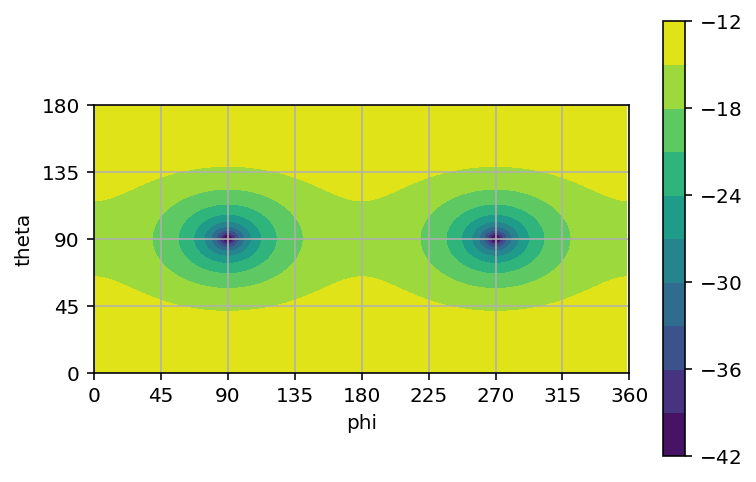

In [28]:
F_plt = 20*np.log10(abs(F)) # convert to dB magnitude for plotting
F_plt  = np.clip(F_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,F_plt,10)
plt.axis('image')
#ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

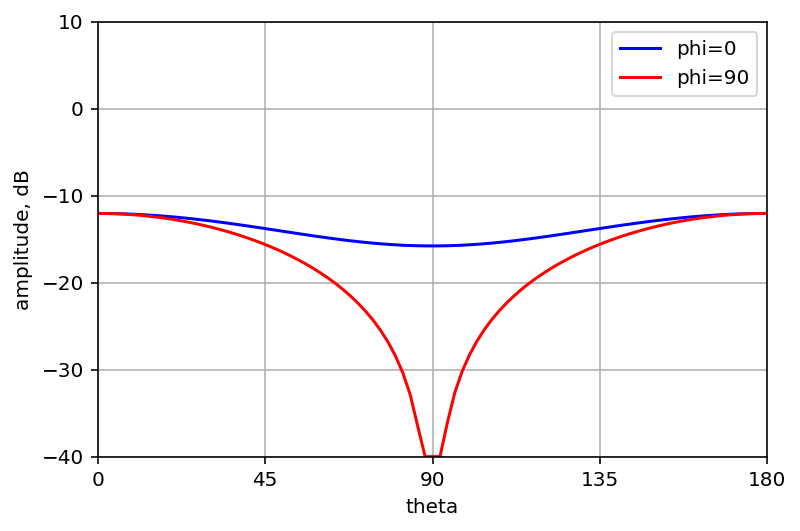

In [29]:
# plotting principle plane cuts
plt.plot(theta,F_plt[:,0],'b',label='phi=0')
plt.plot(theta,F_plt[:,45],'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(-40,10)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

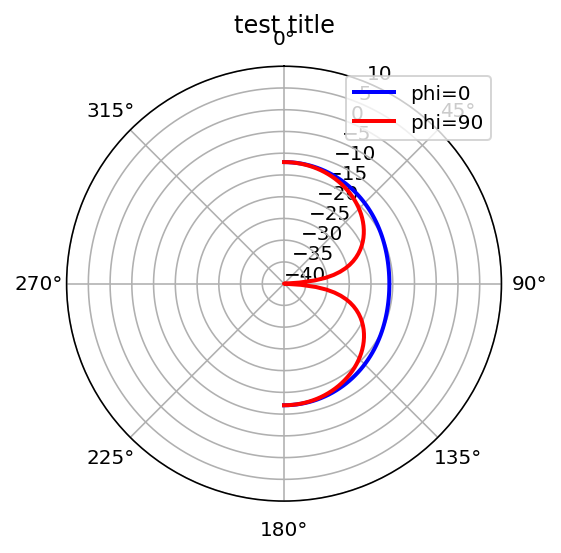

In [30]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = -40 #set plot grid
maxGrid = 11
gridSpacing = 5
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta*np.pi/180,F_plt[:,0],'b',linewidth = 2,label='phi=0')
ax.plot(theta*np.pi/180,F_plt[:,45],'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()